1. Simple linear regression model is a model that uses a straight line to describe the relationship between variables. The components are X, which is the input variable; Y, the outcome variable; β1 or slope coefficient,  the rate of change in the outcome variable Y for a one-unit increase in X, showing how strongly X affects Y; β0 or intercept, the value of Y when X = 0; and ϵ or error term, the variability of Y that is not explained by X, representing the distance between Y values and the line. We assume that for each value of X, the corresponding Y values are sampled from a normal distribution with mean β0+β1X and variance σ^2, which is equivalent to Y∼N(β0+β1X,σ^2).

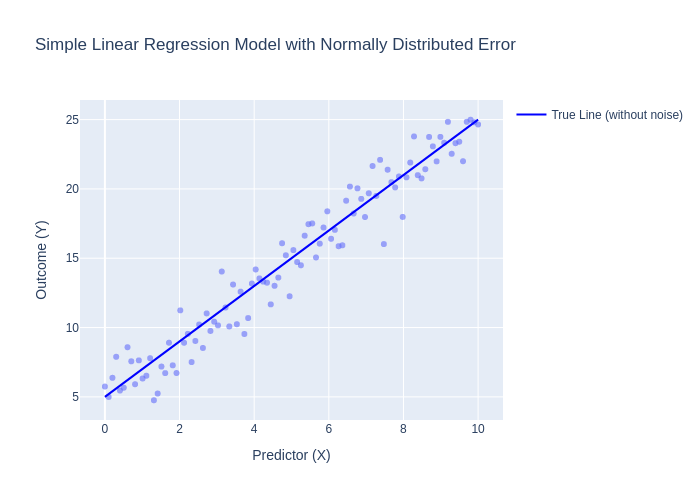

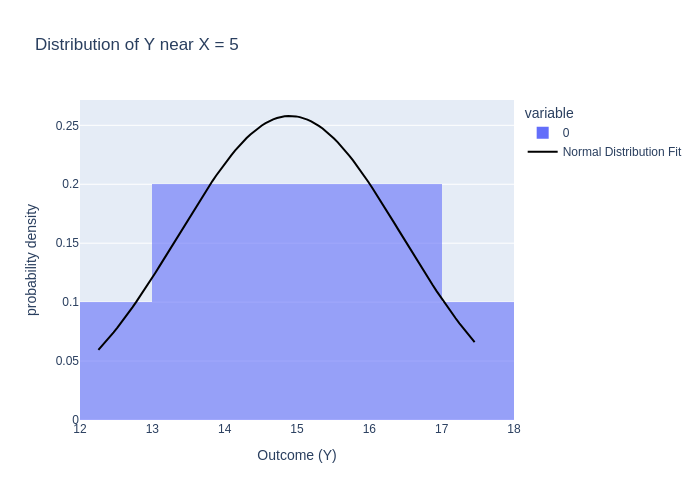

In [2]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Define model parameters
beta_0 = 5    # Intercept
beta_1 = 2    # Slope
sigma = 1.5   # Standard deviation of the error term

# Generate predictor variable (X)
X = np.linspace(0, 10, 100)

# Generate error term (epsilon), assumed to be normally distributed
epsilon = np.random.normal(0, sigma, X.shape)

# Calculate outcome variable (Y) based on the linear model
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for Plotly
import pandas as pd
df = pd.DataFrame({"X": X, "Y": Y, "True_Y": beta_0 + beta_1 * X})

# Plot the data points and the true regression line using Plotly
fig = px.scatter(df, x="X", y="Y", opacity=0.6, title="Simple Linear Regression Model with Normally Distributed Error",
                 labels={"X": "Predictor (X)", "Y": "Outcome (Y)"})
fig.add_trace(go.Scatter(x=df["X"], y=df["True_Y"], mode="lines", name="True Line (without noise)", line=dict(color="blue")))

fig.show(renderer='png')

# Check if the Y values approximate a normal distribution for any given X
# We’ll pick a value of X to observe the distribution of Y around it
X_value = 5
Y_values_near_X = Y[np.abs(X - X_value) < 0.5]  # Select Y values near X = 5

# Plot histogram of Y values around X = 5
fig_hist = px.histogram(Y_values_near_X, nbins=10, title="Distribution of Y near X = 5",
                        labels={"value": "Outcome (Y)", "count": "Density"}, opacity=0.6, histnorm="probability density")
# Overlay a normal distribution curve
mu, std = norm.fit(Y_values_near_X)
x = np.linspace(min(Y_values_near_X), max(Y_values_near_X), 100)
pdf = norm.pdf(x, mu, std)

fig_hist.add_trace(go.Scatter(x=x, y=pdf, mode="lines", name="Normal Distribution Fit", line=dict(color="black")))

fig_hist.show(renderer='png')

## 2. 

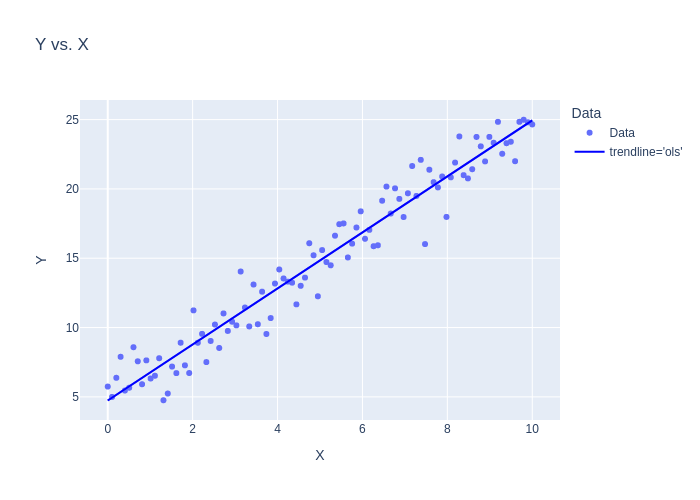

In [3]:
import statsmodels.formula.api as smf  # Used to import the formula API from statsmodels library, providing many statistical formulas
import plotly.express as px  # Used to import library needed to plot graphs

# Set up and fit Ordinary Least Squares (OLS) linear regression model
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

fitted_model.summary()  # Provides a detailed statistical summary of the fitted regression model
fitted_model.summary().tables[1]  # Provides a detailed summary from the second table
fitted_model.params  # Provides the estimated coefficients for the regression model
fitted_model.params.values  # Retrieves the values of the estimated coefficients
fitted_model.rsquared  # Provides the R-squared values of the fitted regression model

df['Data'] = 'Data' # Create a new column name 'Data' and assign 'Data' to every row, ensuring the data points are assigned a category in the legend
fig = px.scatter(df, x='X',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. X') # Create a scatter plot

fig.add_scatter(x=df['X'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

3. The 1st code automatically fits OLS regression model to the data plotted in the scatter plot and displays the trendline, while the 2nd code manually adds a trendline by plotting the fitted values obtained from the model that was explicitly created using statsmodel. The 2nd code provides deeper statistical details than the 1st one.

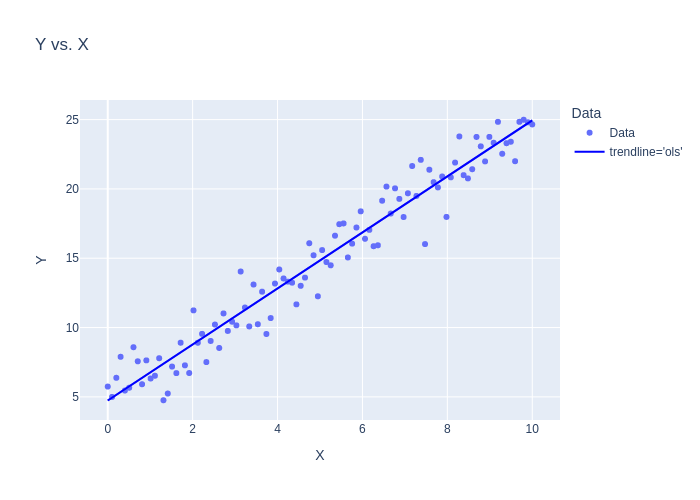

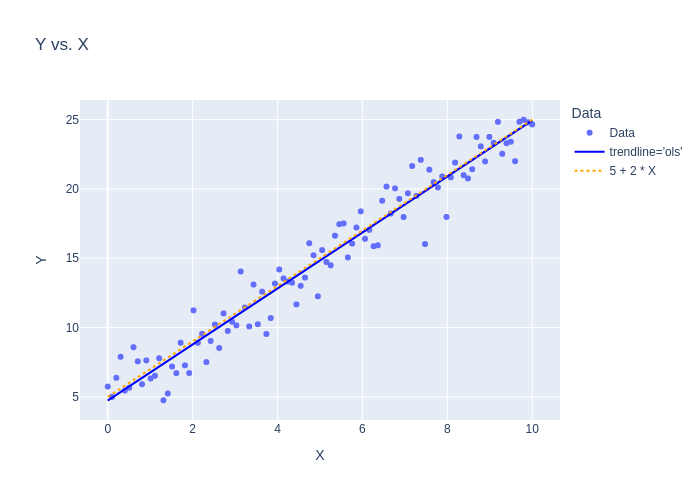

In [4]:
import statsmodels.formula.api as smf  # Used to import the formula API from statsmodels library, providing many statistical formulas
import plotly.express as px  # Used to import library needed to plot graphs

# Set up and fit Ordinary Least Squares (OLS) linear regression model
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

fitted_model.summary()  # Provides a detailed statistical summary of the fitted regression model
fitted_model.summary().tables[1]  # Provides a detailed summary from the second table
fitted_model.params  # Provides the estimated coefficients for the regression model
fitted_model.params.values  # Retrieves the values of the estimated coefficients
fitted_model.rsquared  # Provides the R-squared values of the fitted regression model

df['Data'] = 'Data' # Create a new column name 'Data' and assign 'Data' to every row, ensuring the data points are assigned a category in the legend
fig = px.scatter(df, x='X',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. X') # Create a scatter plot

fig.add_scatter(x=df['X'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

x_range = np.array([df['X'].min(), df['X'].max()])

y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * X', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The code x_range = np.array([df['X'].min(), df['X'].max()]) defines the range of x values used for plotting a custom line (in this case a trendline). It provides more control than trendline='ols' because trendline='ols' automatically calculates and plots a trendline based on the data range in the scatter plot. Moreover, it gives an ability to do custom plotting since trendline='ols' automatically fits and shows a line based on the data without requiring additional calculations.

4. First, we assume the relationship between predictor X and outcome Y as Y=β0+β1X+ϵ. When using statsmodel, the fitted_model.params stored the β0 and β1, which are the intercept and slope respectively. Once we have those coefficients, we can calculate the Y values using fitted_model.fittedvalues by applying the regression formula Yhat=β0+β1X.

## 5. 

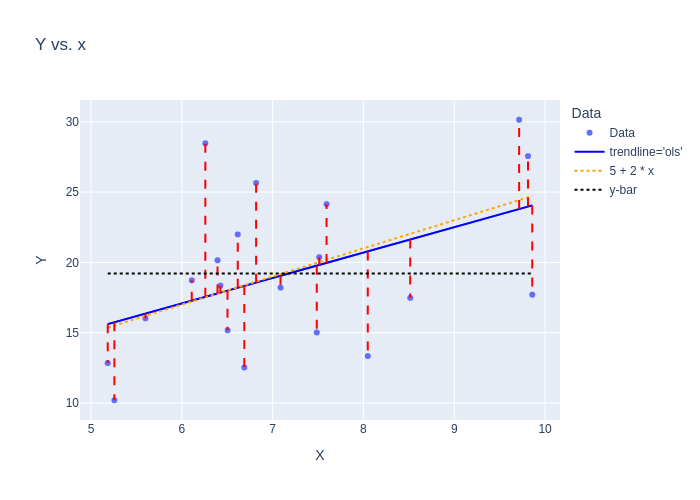

In [5]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta_0 + beta_1 * x + errors

df = pd.DataFrame({'X': x, 'Y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='X',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['X'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['X'].min(), df['X'].max()])
y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['X'][i], df['X'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

OLS regression model chooses a line that minimizes the sum of squared differences between observed and predicted values, ensuring the model is closely following the data points. The 'squares' is needed to simplifies the calculation, underlines large errors, and aligns with the assumption of normally distributed errors, resulting in an optimal solution for the best-fitting line.

6. Interpreting the Expression for 𝑅^2 as "Proportion of Variation Explained": The first component, Total Sum of Squares (TSS), ∑(𝑌−𝑌hat)^2, captures the total variation in 𝑌 around its mean 𝑌hat, representing the baseline variation in 𝑌. The second component, Residual Sum of Squares (RSS), ∑(𝑌−fitted_model.fittedvalues)^2, measures the remaining variation in 𝑌 that is not explained by the model, i.e., the differences between observed values 𝑌 and the predicted values. The expression R^2 = 1-RSS/TSS shows that 𝑅^2 is the proportion of the total variation in 𝑌 that is explained by the model (or the fitted values).<br><br>Why fitted_model.rsquared Measures Model Accuracy? fitted_model.rsquared serves as a quantitative measure of the accuracy of the model’s fit, assessing how well the model’s predictions match the actual observed data. A higher R^2 value suggests a model fit strong fit, while the lower R^2 value suggests a model with weak fit.<br><br>Interpreting np.corrcoef(...)[0,1]^2 in Simple Linear Regression: It captures the square of the correlation coefficients, R^2, between Y and X.

## 7.

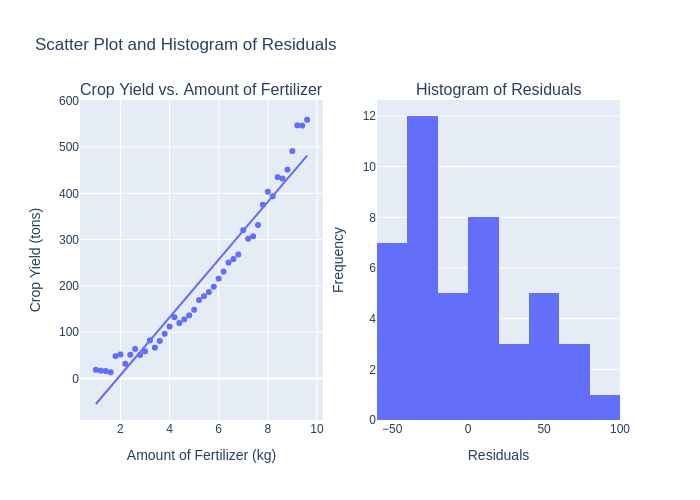

In [6]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Issue 1 = Linearity**<br>Simple linear regression assumes linear relationship between the predictor and the outcome. However, the data does not show a linear trend

**Issue 2 = Homoscedasticity**<br>The variance of the residuals should remain constant across all levels of predictors, which seems to be different in this data where residuals are likely to show increasing variances as the amount of fertilizers increase.

**Issue 3 = Normality of Errors**<br>The errors should be normally distributed, but the histogram of residuals shows that the errors are not normally distributed.

## Summary: 
https://chatgpt.com/share/67280a6d-7b90-8012-91e1-7c0724940c63<br>
1. **Simple Linear Regression Model**:
   - We discussed the basic components of a simple linear regression model, including predictor and outcome variables, slope and intercept coefficients, and the error term, along with a code example using `numpy` and `scipy.stats` to simulate and plot this model.

2. **Code Analysis**:
   - We explored what different lines of code do when working with `statsmodels` (such as `smf.ols(...)` and `fitted_model.summary()`) to specify and fit a linear model, retrieve parameters, and interpret regression summaries.
   - Specifically, we examined `fitted_model.params`, `fitted_model.rsquared`, and additional statistics from `fitted_model.summary().tables[1]`, understanding how these outputs inform us about model coefficients, variance explained, and model accuracy.

3. **Visualization Enhancements**:
   - We talked about how additional plot settings, like `trendline='ols'`, `x_range`, and `color` labels, affect the appearance and interpretation of figures in `plotly.express`.

4. **Model Evaluation (R-Squared)**:
   - We explored how \( R^2 \) (computed via `1 - RSS/TSS`, `fitted_model.rsquared`, and correlation coefficients) serves as the proportion of variance in \( Y \) explained by the model, acting as an indicator of model accuracy in simple linear regression.

5. **Assumptions in Simple Linear Regression**:
   - With a specific dataset on fertilizer use and crop yield, we identified potential violations of linear regression assumptions, specifically: linearity, homoscedasticity, and normality of errors. We noted that a nonlinear model might be more appropriate due to observed patterns in the data.

This conversation provided a comprehensive overview of implementing, interpreting, and validating a simple linear regression model and understanding when a linear approach may be inappropriate for certain datasets.

## 8.

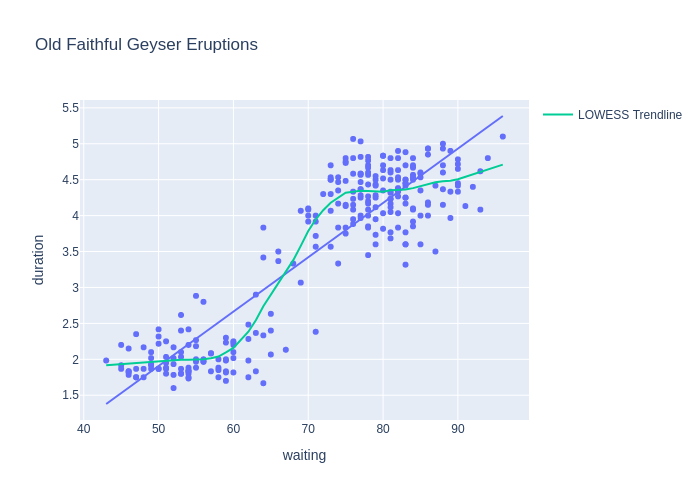

In [7]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**H0:** There is no linear association between the waiting time between eruptions and the duration of the eruption<br>**H1:** There is a linear association between the waiting time between eruptions and the duration of the eruption

In [4]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        23:47:27   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** We can reject the null hypothesis and accept the alternate hypothesis since, first of all, the p-value is less than 0.05, meaning that there is a strong evidence to reject null hypothesis. Then, R^2 value is 0.811, which indicates that there is a strong linear relationship between the waiting time between eruption and the duration of the eruption.

## 9.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


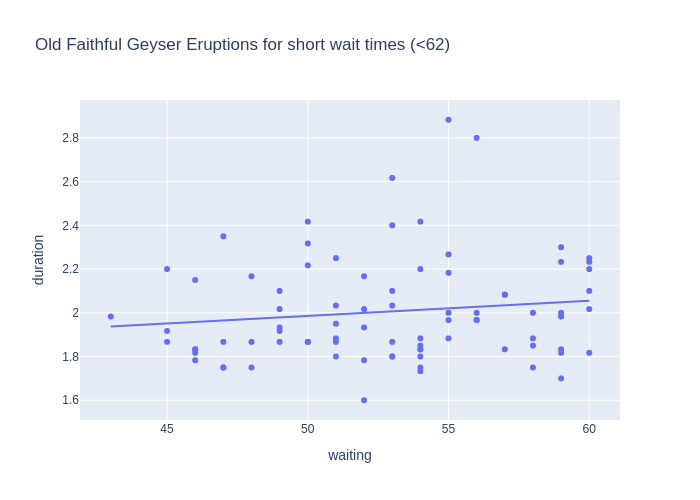

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Interpretation:** From this code that shows shorter waiting times (<62), we obtained a p-value of 0.238, indicating that we don't have any evidence against the null hypothesis, so we accept the null hypothesis. In other words, there is a less clear association for shorter waiting times with the duration of the eruption.

## 10.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


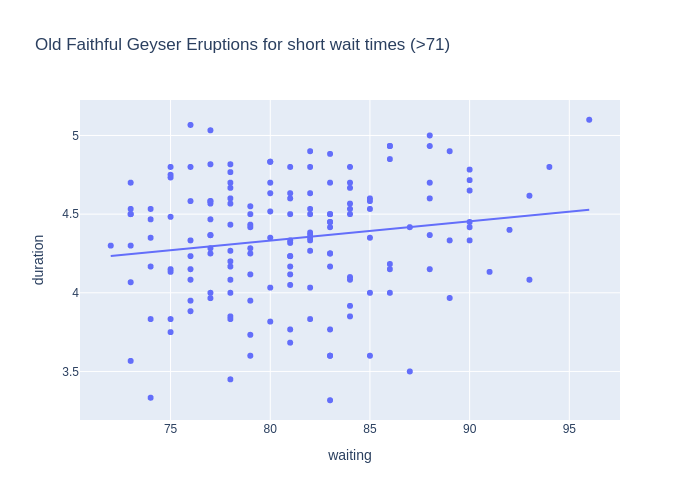

In [12]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## 10.1

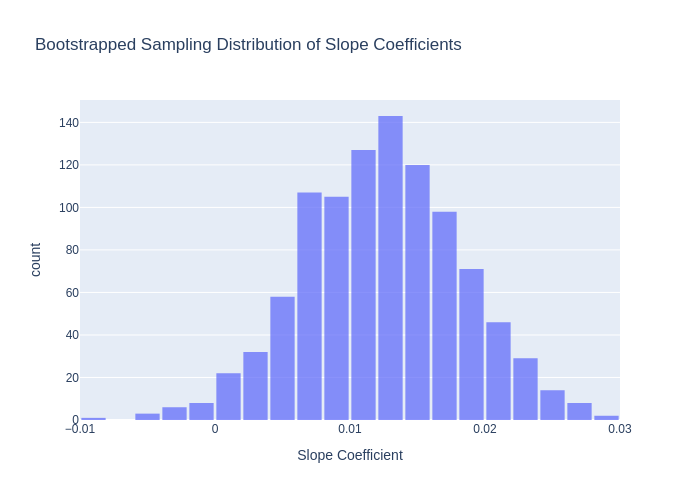

95% Bootstrapped Confidence Interval for the Slope: (0.0008, 0.0240)


In [13]:
import numpy as np

n_bootstraps = 1000
bootstrapped_slopes = []

long_wait_limit = 71
long_wait_data = old_faithful[old_faithful['waiting'] > long_wait_limit]

for _ in range(n_bootstraps):
    bootstrap_sample = long_wait_data.sample(n=len(long_wait_data), replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slopes.append(bootstrap_model.params['waiting'])

bootstrapped_slopes_df = pd.DataFrame(bootstrapped_slopes, columns=['Slope Coefficient'])

fig_bootstrap = px.histogram(
    bootstrapped_slopes_df, x='Slope Coefficient', nbins=30, 
    title="Bootstrapped Sampling Distribution of Slope Coefficients",
    labels={'Slope Coefficient': 'Slope Coefficient'}, opacity=0.75
)
fig_bootstrap.update_layout(bargap=0.1)
fig_bootstrap.show(renderer='png')

ci_lower, ci_upper = np.percentile(bootstrapped_slopes, [2.5, 97.5])
print(f"95% Bootstrapped Confidence Interval for the Slope: ({ci_lower:.4f}, {ci_upper:.4f})")

## 10.2

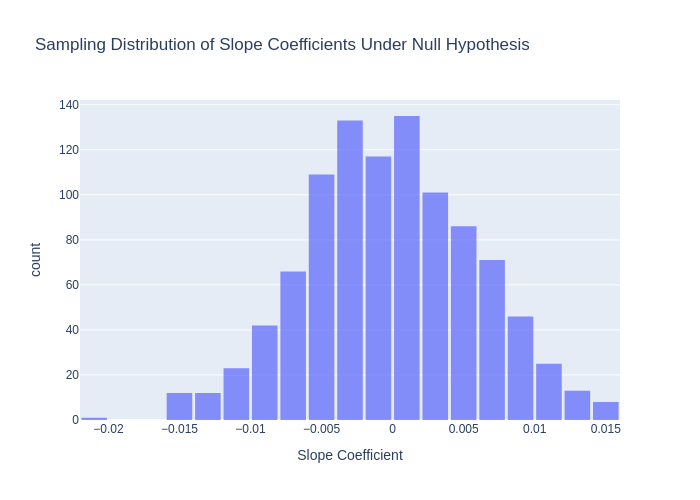

In [14]:
np.random.seed(0)
n_simulations = 1000
simulated_slopes = []

beta_0 = 1.65
beta_1 = 0
sigma = 0.37

for _ in range(n_simulations):
    simulated_y = beta_0 + beta_1 * long_wait_data['waiting'] + np.random.normal(0, sigma, size=len(long_wait_data))
    simulated_data = pd.DataFrame({'waiting': long_wait_data['waiting'], 'duration': simulated_y})
    simulated_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slopes.append(simulated_model.params['waiting'])

simulated_slopes_df = pd.DataFrame(simulated_slopes, columns=['Slope Coefficient'])

fig_simulated = px.histogram(
    simulated_slopes_df, x='Slope Coefficient', nbins=30, 
    title="Sampling Distribution of Slope Coefficients Under Null Hypothesis",
    labels={'Slope Coefficient': 'Slope Coefficient'}, opacity=0.75
)
fig_simulated.update_layout(bargap=0.1)
fig_simulated.show(renderer='png')

## 10.3

In [15]:
contains_zero = ci_lower <= 0 <= ci_upper
print(f"Does the 95% bootstrapped CI contain 0? {'Yes' if contains_zero else 'No'}")

original_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
observed_slope = original_model.params['waiting']
simulated_p_value = (np.sum(np.abs(simulated_slopes) >= np.abs(observed_slope))) / n_simulations
print(f"Simulated p-value: {simulated_p_value:.4f}")

print(original_model.summary().tables[1])

Does the 95% bootstrapped CI contain 0? No
Simulated p-value: 0.0410
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


## 11.

**11.1** `smf.ols('duration ~ waiting', data=old_faithful)` uses waiting time as a continuous predictor, capturing a linear relationship and assuming a single, continuous effect of waiting time on duration, regardless of any natural grouping (like "short" or "long").

**11.2** `smf.ols('duration ~ waiting', data=old_faithful[short_wait])` restricted the dataset to only short wait times (e.g., < 64 minutes), evaluating if there’s a linear trend in eruption duration only for "short" wait times, but doesn’t capture the relationship across the entire range or consider long wait times.

**11.3** `smf.ols('duration ~ waiting', data=old_faithful[long_wait])` model is fit to only long wait times (e.g., > 71 minutes), modeling the relationship between waiting time and duration just within the long category. It captures only the trend among long wait times without comparing it to short wait times.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


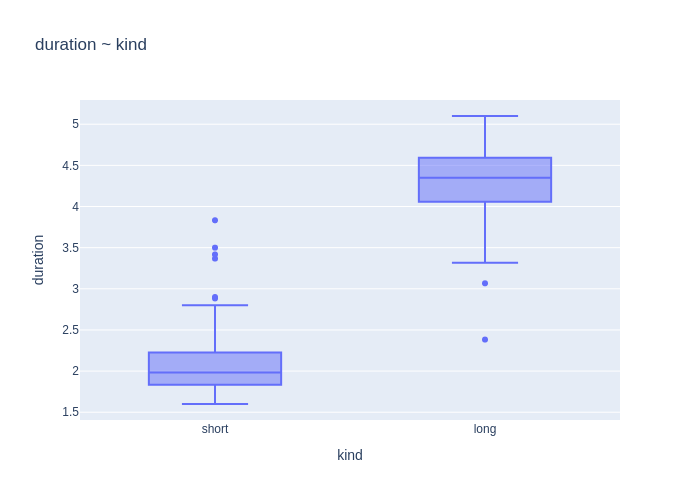

In [16]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Interpretation:** From this new indicator-variable model, we obtained a p-value less than 0.001, indicating that there is a strong evidence against the null hypothesis and leading us to accept the alternate hypothesis. In other words, there is a significant difference between the short and long groups.

## 12.

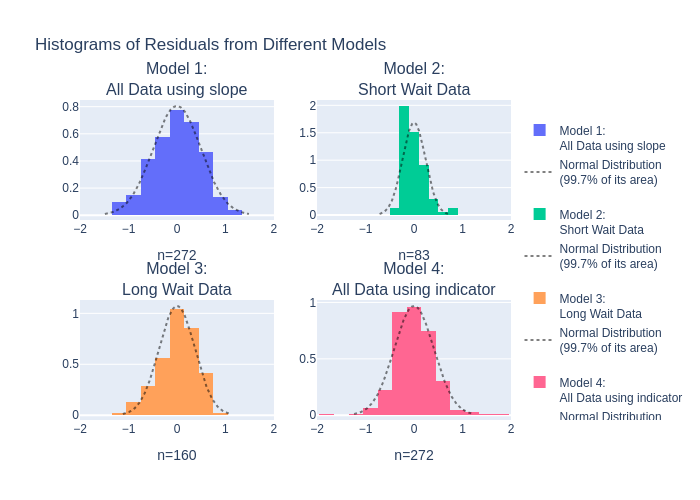

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Model 1** suggests the plausibility of the assumption that the distribution of error terms is normal for each terms because it uses continuous predictors across all data. On the other hand, the other models do not support this assumption since the restricted ranges may lead to skew or a non-normal error distribution, for **Models 2 and 3**, and since **Model 4** show the least normal residuals due to the non-continuous nature of the predictor variable, which doesn’t fully capture the underlying continuous relationship.

## 13. A. Permutation Test

In [19]:
import numpy as np
import pandas as pd
from scipy import stats

short_group = old_faithful[old_faithful['waiting'] < 68]['duration']
long_group = old_faithful[old_faithful['waiting'] >= 68]['duration']

observed_diff = short_group.mean() - long_group.mean()

n_permutations = 10000
permuted_diffs = np.empty(n_permutations)

combined_data = np.concatenate([short_group, long_group])

for i in range(n_permutations):
    np.random.shuffle(combined_data)
    perm_short = combined_data[:len(short_group)]
    perm_long = combined_data[len(short_group):]
    
    permuted_diffs[i] = perm_short.mean() - perm_long.mean()

p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print(f"Observed Difference in Means: {observed_diff:.4f}")
print(f"P-value from Permutation Test: {p_value:.4f}")

Observed Difference in Means: -2.2036
P-value from Permutation Test: 0.0000


## 13. B. 95% Confidence Interval

In [20]:
n_bootstrap_samples = 10000
bootstrapped_mean_diffs = np.empty(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    short_resample = np.random.choice(short_group, size=len(short_group), replace=True)
    long_resample = np.random.choice(long_group, size=len(long_group), replace=True)
    
    bootstrapped_mean_diffs[i] = short_resample.mean() - long_resample.mean()

confidence_interval = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

print(f"95% Bootstrap Confidence Interval for the Difference in Means: {confidence_interval}")

95% Bootstrap Confidence Interval for the Difference in Means: [-2.29969356 -2.0983114 ]


## 13. (a).

**Permutation Testing** relies on random shuffling and is used to assess the likelihood of observing an effect as extreme as the one measured under the null hypothesis.<br><br>
**Procedures:**<br>
1.Pool all eruption durations together and then randomly reassign them into two groups of the same sizes as the original "short" and "long" groups. This random shuffling simulates the idea that group labels ("short" and "long") are interchangeable under the null hypothesis.<br>
2.For each permutation, calculate the mean difference between the groups.<br>
3.After repeating this process many times, the distribution of these permuted mean differences represents the null distribution.<br><br>
**Bootstrap Confidence Intervals** are created by repeatedly resampling with replacement to estimate the uncertainty in the observed difference. They offer a way to construct confidence intervals for the mean difference without assumptions about normality.<br><br>
**Procedures:**<br>
1.For each bootstrap iteration, sample (with replacement) separately from the "short" and "long" groups, maintaining the original sample sizes within each group.<br>
2.Calculate the mean of each resampled group and then compute the difference in these means.<br>
3.Repeat this process many times to build a distribution of mean differences across bootstrap samples.<br><br>

## 13. (b).
**Permutation Testing vs. Indicator Variable Model**<br>
**Similarity:** Both methods evaluate the effect of group differences ("short" vs. "long") on eruption duration.<br>
**Difference:** Permutation testing doesn’t rely on linear model assumptions, while the indicator variable model relies on linear regression assumptions.<br><br>

**Bootstrap Confidence Interval vs. Indicator Variable Model**<br>
**Similarity:** Both provide intervals for estimating the difference between "short" and "long" groups.<br>
**Difference:** The bootstrap confidence interval is a non-parametric estimate of the difference in means, while the indicator model’s interval comes from a bootstrapped regression model and requires more assumptions.

## 14. Yes!

## Summary
**Link:** https://chatgpt.com/share/672d0d45-1b54-8012-b538-e704e3d4a33b

Certainly! Here’s a summary of our discussion:

1. **Analysis of Geyser Eruption Data with Short and Long Wait Times**:
   - We initially analyzed the Old Faithful geyser eruption data, exploring the relationship between eruption duration and wait time using Simple Linear Regression models. We investigated whether there was a notable difference in eruption duration based on categorized wait times.

2. **Exploring Short Wait Times (<64 minutes)**:
   - By restricting the data to short wait times, we used linear regression to assess if there was still a relationship between wait time and duration. We interpreted model summaries and examined evidence for a relationship within this subset.

3. **Analysis of Long Wait Times (>71 minutes)**:
   - We then focused on long wait times, conducting a bootstrap analysis to create a sampling distribution of slope coefficients. We also simulated samples under the null hypothesis (no association between wait time and duration) to compare against observed data and calculate a confidence interval.

4. **Indicator Variable Model for Short vs. Long Waits**:
   - We used an indicator variable to compare eruption durations between short (<68 minutes) and long waits, reconfiguring our model specification. This model allowed us to assess the average difference between the two categories directly, contrasting it with earlier continuous models based on wait time. We discussed how this indicator approach offers a distinct perspective on the effect of categorical group differences.

5. **Testing the Assumption of Normally Distributed Errors**:
   - By visualizing residuals through histograms, we evaluated the normality assumption for error terms in each model. We identified which models met or deviated from this assumption, which is essential for interpreting linear regression results.

6. **Permutation Testing for Group Differences**:
   - We conducted a permutation test to evaluate the null hypothesis that eruption durations are similar across "short" and "long" groups. This non-parametric test involved shuffling group labels to simulate the distribution of mean differences under the null.

7. **Bootstrap Confidence Interval for Mean Differences**:
   - We created a 95% bootstrap confidence interval for the difference in mean durations between the two groups. By repeatedly resampling within each group, we estimated an interval for the difference without relying on normality assumptions.

8. **Comparison of Methods**:
   - Finally, we compared the permutation test, bootstrap confidence interval, and indicator variable model. We discussed how the permutation test and bootstrap confidence interval offer flexible, non-parametric insights, while the indicator model provides a more formal parametric estimate under regression assumptions. Each method provides unique strengths depending on the analysis context and assumptions required.

Overall, our analysis combined statistical modeling and resampling methods to assess differences in eruption duration across varying wait times, giving a robust, multi-faceted understanding of the data.